## Data loading

### Subtask:
Load the "device.csv" file into a Pandas DataFrame.


In [1]:
import pandas as pd

df = pd.read_csv('device.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'device.csv'

## Data exploration

### Subtask:
Explore the loaded data to understand its structure and characteristics.


In [ ]:
# Examine the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Check the data types of each column
print("\nData Types:\n", df.dtypes)

# Identify potential missing values
print("\nMissing Values:\n", df.isnull().sum())

# Examine the distribution of data in relevant columns
print("\nLogin Counts per PC:\n", df.groupby('pc')['id'].count())
print("\nLogin Times Distribution:\n", df['date'].describe())

# Explore unique values in categorical columns
print("\nUnique PCs:", df['pc'].nunique())

# Calculate basic descriptive statistics
print("\nDescriptive Statistics for Login Times:\n", df['date'].describe())

# Understand the correlation between variables
# Convert 'date' to datetime objects for correlation analysis
df['date'] = pd.to_datetime(df['date'])
# Extract hour and day of the week from 'date'
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
correlation_matrix = df[['hour', 'day_of_week']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

DataFrame Shape: (405380, 5)

Data Types:
 id          object
date        object
user        object
pc          object
activity    object
dtype: object

Missing Values:
 id          0
date        0
user        0
pc          0
activity    0
dtype: int64

Login Counts per PC:
 pc
PC-0004      24
PC-0008    1757
PC-0039      12
PC-0044      14
PC-0072      10
           ... 
PC-9966      14
PC-9973      12
PC-9979      10
PC-9988      34
PC-9999      16
Name: id, Length: 971, dtype: int64

Login Times Distribution:
 count                  405380
unique                 399631
top       07/09/2010 09:48:08
freq                        4
Name: date, dtype: object

Unique PCs: 971

Descriptive Statistics for Login Times:
 count                  405380
unique                 399631
top       07/09/2010 09:48:08
freq                        4
Name: date, dtype: object

Correlation Matrix:
                  hour  day_of_week
hour         1.000000    -0.003663
day_of_week -0.003663     1.000000


In [ ]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Extract hour, day, and day of the week from 'date'
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

## Data wrangling

### Subtask:
Prepare the data for analysis by creating new columns representing weekend logins and extracting relevant information from the timestamp.


In [ ]:
# Create a new column 'is_weekend' indicating whether a login occurred on a weekend
df['is_weekend'] = df['day_of_week'].isin([5, 6])

# Ensure 'date' column is in datetime format (already done in the previous step)
# df['date'] = pd.to_datetime(df['date'])  # Uncomment if needed

# Create a new column indicating the day of the month from the 'date' column
df['day_of_month'] = df['date'].dt.day

display(df.head())

,id,date,user,pc,activity,hour,day_of_week,day,is_weekend,day_of_month
0,{J1S3-L9UU75BQ-7790ATPL},2010-01-02 07:21:06,MOH0273,PC-6699,Connect,7,5,2,True,2
1,{N7B5-Y7BB27SI-2946PUJK},2010-01-02 07:37:41,MOH0273,PC-6699,Disconnect,7,5,2,True,2
2,{U1V9-Z7XT67KV-5649MYHI},2010-01-02 07:59:11,HPH0075,PC-2417,Connect,7,5,2,True,2
3,{H0Z7-E6GB57XZ-1603MOXD},2010-01-02 07:59:49,IIW0249,PC-0843,Connect,7,5,2,True,2
4,{L7P2-G4PX02RX-7999GYOY},2010-01-02 08:04:26,IIW0249,PC-0843,Disconnect,8,5,2,True,2


## Data analysis

### Subtask:
Analyze the data to understand the number of weekend logins for each PC and the number of logins at each hour in each day.


In [ ]:
# Calculate the number of weekend logins for each PC
weekend_logins_df = df.groupby(['pc', 'is_weekend'])['id'].count().unstack().fillna(0)

# Calculate the number of logins at each hour in each day
hourly_logins_df = df.groupby(['hour', 'day_of_week'])['id'].count().unstack().fillna(0)

display(weekend_logins_df.head())
display(hourly_logins_df.head())

is_weekend,False,True
pc,,
PC-0004,24.0,0.0
PC-0008,1427.0,330.0
PC-0039,12.0,0.0
PC-0044,14.0,0.0
PC-0072,10.0,0.0


day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,160,172,172,139,163,12,2
1,171,169,201,171,161,8,6
2,168,201,207,183,150,10,2
3,136,188,184,201,164,24,4
4,174,195,172,153,166,10,7


## Data visualization

### Subtask:
Visualize the number of weekend logins for each PC and the number of logins at each hour in each day.


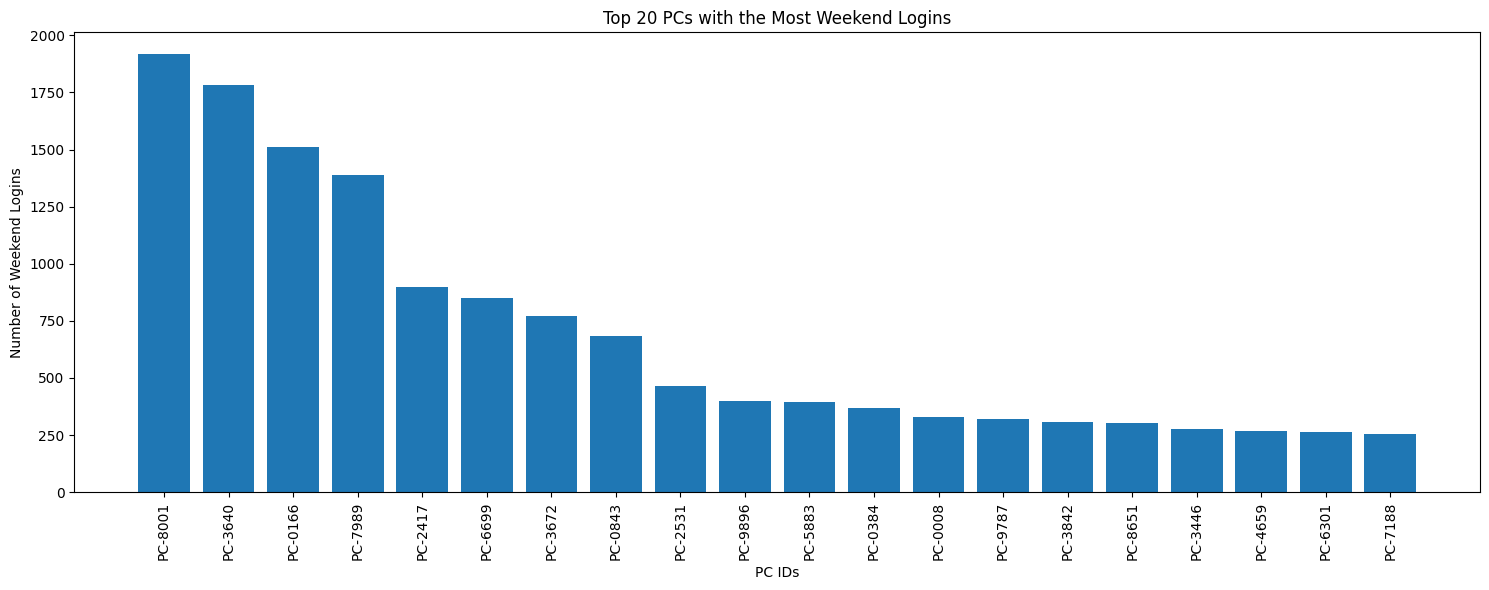

In [ ]:
import matplotlib.pyplot as plt

# Sort PCs by the number of weekend logins in descending order
weekend_logins_sorted = weekend_logins_df.sort_values(True, ascending=False)

# Select top N PCs for visualization (adjust N as needed)
top_n_pcs = 20
weekend_logins_top_n = weekend_logins_sorted[True][:top_n_pcs]

plt.figure(figsize=(15, 6))
plt.bar(weekend_logins_top_n.index, weekend_logins_top_n)
plt.xlabel("PC IDs")
plt.ylabel("Number of Weekend Logins")
plt.title("Top {} PCs with the Most Weekend Logins".format(top_n_pcs))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

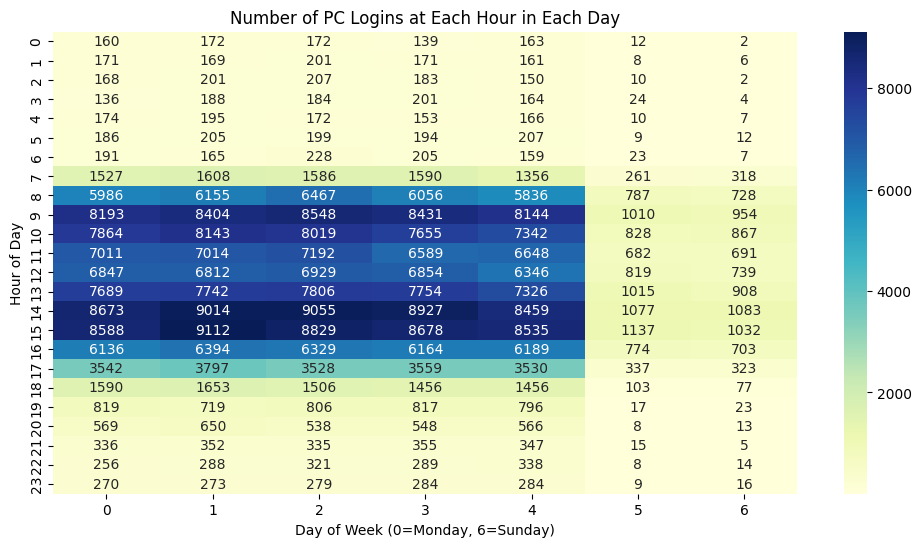

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_logins_df, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Day of Week (0=Monday, 6=Sunday)")
plt.ylabel("Hour of Day")
plt.title("Number of PC Logins at Each Hour in Each Day")
plt.show()